In [6]:
# import os
# import numpy as np
# import h5py
# import cv2
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, Dropout, GlobalAveragePooling2D, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.metrics import MeanIoU
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # تنظیمات
# DATA_PATH = './IMAGE'
# SIZE_X = 224  
# SIZE_Y = 224  
# BATCH_SIZE = 9
# EPOCHS = 100
# VAL_SPLIT = 0.2

# # 1. توابع پیش‌پردازش -----------------------------------------------------------
# def standardize(x):
#     x = np.array(x, dtype='float32')
#     x -= np.min(x)
#     x /= np.percentile(x, 98)
#     x = np.clip(x, 0, 1)
#     return x

# def preprocess_image_mask(img, mask):
#     img = cv2.resize(img, (SIZE_X, SIZE_Y))
#     img = standardize(img)
#     img = np.expand_dims(img, axis=-1)  
    
#     mask = cv2.resize(mask, (SIZE_X, SIZE_Y), interpolation=cv2.INTER_NEAREST)
#     mask = np.clip(mask, 0, 1).astype(np.uint8)  # تبدیل به باینری
#     return img, mask

# def load_dataset(data_path):
#     images = []
#     masks = []
#     labels = []

#     for file_name in tqdm(os.listdir(data_path)):
#         if file_name.endswith('.mat'):
#             with h5py.File(os.path.join(data_path, file_name), 'r') as f:
#                 cjdata = f['cjdata']
#                 img = np.array(cjdata['image']).astype('float32')
#                 mask = np.array(cjdata['tumorMask']).astype('float32')
                
#                 img, mask = preprocess_image_mask(img, mask)
                
#                 images.append(img)
#                 masks.append(mask)
#                 labels.append(int(np.array(cjdata['label']).flatten()[0]) - 1)

#     return np.array(images), np.array(masks), np.array(labels)

# # بارگذاری داده‌ها
# print("Loading data...")
# images, masks, labels = load_dataset(DATA_PATH)
# num_classes = len(np.unique(labels))  # محاسبه تعداد کلاس‌ها

# # تقسیم داده‌ها
# print("Splitting data...")
# indices = np.arange(len(images))
# train_indices, test_indices = train_test_split(
#     indices,
#     test_size=VAL_SPLIT,
#     random_state=42,
#     stratify=labels
# )

# X_train = images[train_indices]
# X_test = images[test_indices]
# y_train_seg = masks[train_indices]
# y_test_seg = masks[test_indices]
# y_train_cls = labels[train_indices]
# y_test_cls = labels[test_indices]

# # 2. افزایش داده ---------------------------------------------------------------
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True
# )



Loading data...


100%|█████████████████████████████████████████████████████████████████████████████| 1155/1155 [00:07<00:00, 155.88it/s]


Splitting data...


In [7]:
# print("Shapes:")
# print(f"X_train: {X_train.shape}")
# print(f"y_train_seg: {y_train_seg.shape}")
# print(f"y_train_cls: {y_train_cls.shape}")
# print(f"X_test: {X_test.shape}")
# print(f"y_test_seg: {y_test_seg.shape}")
# print(f"y_test_cls: {y_test_cls.shape}")

Shapes:
X_train: (922, 224, 224, 1)
y_train_seg: (922, 224, 224)
y_train_cls: (922,)
X_test: (231, 224, 224, 1)
y_test_seg: (231, 224, 224)
y_test_cls: (231,)


In [5]:
# import os
# import numpy as np
# import h5py
# import cv2
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import (Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose,
#                                      Dropout, GlobalAveragePooling2D, Dense)
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
# from tensorflow.keras.metrics import MeanIoU
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # تنظیمات
# DATA_PATH = './IMAGE'
# SIZE_X = 224  
# SIZE_Y = 224  
# BATCH_SIZE = 9
# EPOCHS = 100
# VAL_SPLIT = 0.2

# # توابع پیش‌پردازش

# def standardize(x):
#     x = np.array(x, dtype='float32')
#     x -= np.min(x)
#     x /= (np.max(x) + 1e-7)
#     return x

# def preprocess_image_mask(img, mask):
#     img = cv2.resize(img, (SIZE_X, SIZE_Y))
#     img = standardize(img)
#     img = np.expand_dims(img, axis=-1)
    
#     mask = cv2.resize(mask, (SIZE_X, SIZE_Y), interpolation=cv2.INTER_NEAREST)
#     mask = (mask > 0.5).astype(np.uint8)
#     return img, mask

# def load_dataset(data_path):
#     images, masks, labels = [], [], []
    
#     for file_name in tqdm(os.listdir(data_path)):
#         if file_name.endswith('.mat'):
#             with h5py.File(os.path.join(data_path, file_name), 'r') as f:
#                 cjdata = f['cjdata']
#                 img = np.array(cjdata['image']).astype('float32')
#                 mask = np.array(cjdata['tumorMask']).astype('float32')
#                 img, mask = preprocess_image_mask(img, mask)
                
#                 images.append(img)
#                 masks.append(mask)
#                 labels.append(int(np.array(cjdata['label']).flatten()[0]) - 1)
    
#     return np.array(images), np.array(masks), np.array(labels)

# print("Loading data...")
# images, masks, labels = load_dataset(DATA_PATH)
# num_classes = len(np.unique(labels))

# # تقسیم داده‌ها
# train_indices, test_indices = train_test_split(np.arange(len(images)), test_size=VAL_SPLIT, random_state=42, stratify=labels)

# X_train, X_test = images[train_indices], images[test_indices]
# y_train_seg, y_test_seg = masks[train_indices], masks[test_indices]
# y_train_cls, y_test_cls = labels[train_indices], labels[test_indices]

# y_train_seg = np.expand_dims(y_train_seg, axis=-1)
# y_test_seg = np.expand_dims(y_test_seg, axis=-1)

# # افزایش داده
# image_data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, vertical_flip=True)

# # تعریف مدل U-Net

# def multi_unet_model(IMG_HEIGHT=224, IMG_WIDTH=224, IMG_CHANNELS=1, num_classes=3):
#     inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
#     c1 = Conv2D(16, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(inputs)
#     p1 = MaxPooling2D((2,2))(c1)
    
#     c2 = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(p1)
#     p2 = MaxPooling2D((2,2))(c2)
    
#     c3 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(p2)
#     p3 = MaxPooling2D((2,2))(c3)
    
#     c4 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(p3)
#     p4 = MaxPooling2D((2,2))(c4)
    
#     c5 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(p4)
    
#     u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
#     u6 = concatenate([u6, c4])
    
#     u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(u6)
#     u7 = concatenate([u7, c3])
    
#     u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(u7)
#     u8 = concatenate([u8, c2])
    
#     u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(u8)
#     u9 = concatenate([u9, c1])
    
#     outputs_seg = Conv2D(1, (1,1), activation='sigmoid', name='output_seg')(u9)
    
#     gap = GlobalAveragePooling2D()(c5)
#     dense1 = Dense(128, activation='relu')(gap)
#     outputs_cls = Dense(num_classes, activation='softmax', name='output_cls')(dense1)
    
#     return Model(inputs=[inputs], outputs=[outputs_seg, outputs_cls])

# # مدل و کامپایل
# model = multi_unet_model(IMG_HEIGHT=SIZE_X, IMG_WIDTH=SIZE_Y, IMG_CHANNELS=1, num_classes=num_classes)
# model.compile(optimizer=Adam(learning_rate=1e-4),
#               loss={'output_seg': BinaryCrossentropy(), 'output_cls': SparseCategoricalCrossentropy()},
#               metrics={'output_seg': ['accuracy', MeanIoU(num_classes=2)], 'output_cls': ['accuracy']})

# # کالبک‌ها
# callbacks = [EarlyStopping(patience=10, restore_best_weights=True, verbose=1),
#              ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6, verbose=1)]

# # آموزش مدل
# history = model.fit(image_data_gen.flow(X_train, {'output_seg': y_train_seg, 'output_cls': y_train_cls}, batch_size=BATCH_SIZE),
#                     epochs=EPOCHS,
#                     validation_data=(X_test, {'output_seg': y_test_seg, 'output_cls': y_test_cls}),
#                     callbacks=callbacks)

Loading data...


100%|██████████| 1155/1155 [00:15<00:00, 74.03it/s]


ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (922, 224, 224, 1), y.shape = ()

In [9]:
# محاسبه تعداد کلاس‌ها
n_classes = len(np.unique(y_train_cls))
print(f"Number of classes: {n_classes}")

Number of classes: 3


In [4]:
i=0
for index in y_train_cls:
    if index ==3:
        i+=1
        print(i)

Loading data...
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_54 (Conv2D)             (None, 224, 224, 16  160         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_30 (Dropout)           (None, 224, 224, 16  0           ['conv2d_54[0][0]']              
                                )                                           

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ehsan\AppData\Local\Temp\ipykernel_11344\2835155269.py", line 173, in <module>
      history = model.fit(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ehsan\AppData\Local\Temp\ipykernel_11344\2835155269.py", line 173, in <module>
      history = model.fit(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Ehsan\.conda\envs\tf_env\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [8,3] and labels shape [401408]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[confusion_matrix/assert_non_negative_1/assert_less_equal/Assert/AssertGuard/pivot_f/_12/_59]]
  (1) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [8,3] and labels shape [401408]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_25057]

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [6]:
# چک شکل‌ها
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train_seg: {y_train_seg.shape}")
print(f"y_train_cls: {y_train_cls.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test_seg: {y_test_seg.shape}")
print(f"y_test_cls: {y_test_cls.shape}")

Shapes:
X_train: (922, 224, 224, 1)
y_train_seg: (922, 224, 224, 1)
y_train_cls: (922,)
X_test: (231, 224, 224, 1)
y_test_seg: (231, 224, 224, 1)
y_test_cls: (231,)


In [7]:
# چک دیتاتایپ و مقادیر
print("\nData Types:")
print(f"y_train_seg dtype: {y_train_seg.dtype}, min: {np.min(y_train_seg)}, max: {np.max(y_train_seg)}")
print(f"y_train_cls dtype: {y_train_cls.dtype}, unique: {np.unique(y_train_cls)}")


Data Types:
y_train_seg dtype: uint8, min: 0, max: 1
y_train_cls dtype: int32, unique: [0 1 2]


In [8]:
import tensorflow as tf
tf.debugging.enable_check_numerics()  # فعال‌سازی حالت دیباگ

INFO:tensorflow:Enabled check-numerics callback in thread MainThread


In [16]:
import os
import numpy as np
import h5py
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, Dropout, Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import MeanIoU, SparseCategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tqdm import tqdm

# تنظیمات
DATA_PATH = './IMAGE'
SIZE_X = 224  
SIZE_Y = 224  
BATCH_SIZE = 9
EPOCHS = 100
VAL_SPLIT = 0.2

# 1. توابع پیش‌پردازش -----------------------------------------------------------
def standardize(x):
    x = np.array(x, dtype='float32')
    x -= np.min(x)
    x /= np.percentile(x, 98)
    x = np.clip(x, 0, 1)
    return x

def preprocess_image_mask(img, mask):
    img = cv2.resize(img, (SIZE_X, SIZE_Y))
    img = standardize(img)
    img = np.expand_dims(img, axis=-1)  # تبدیل به شکل (224, 224, 1)
    
    mask = cv2.resize(mask, (SIZE_X, SIZE_Y), interpolation=cv2.INTER_NEAREST)
    mask = np.clip(mask, 0, 1).astype(np.uint8)  # تبدیل به باینری
    return img, mask

def load_dataset(data_path):
    images = []
    masks = []
    labels = []

    for file_name in tqdm(os.listdir(data_path)):
        if file_name.endswith('.mat'):
            with h5py.File(os.path.join(data_path, file_name), 'r') as f:
                cjdata = f['cjdata']
                img = np.array(cjdata['image']).astype('float32')
                mask = np.array(cjdata['tumorMask']).astype('float32')
                
                img, mask = preprocess_image_mask(img, mask)
                
                images.append(img)
                masks.append(mask)
                labels.append(int(np.array(cjdata['label']).flatten()[0]) - 1)

    return np.array(images), np.array(masks), np.array(labels)

# بارگذاری داده‌ها
print("Loading data...")
images, masks, labels = load_dataset(DATA_PATH)

# تقسیم داده‌ها
# تقسیم داده‌ها
X_train, X_test, y_train_mask, y_test_mask, y_train_labels, y_test_labels = train_test_split(
    images, masks, labels,
    test_size=VAL_SPLIT, 
    random_state=42,
    stratify=labels
)

# 2. تعریف مدل ترکیبی U-Net + کلاسیفیکیشن --------------------------------------
def combined_model(IMG_HEIGHT=224, IMG_WIDTH=224, IMG_CHANNELS=1, num_classes=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    # Encoder
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(inputs)
    c1 = Dropout(0.3)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c1)
    p1 = MaxPooling2D((2,2))(c1)
    
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c3)
    p3 = MaxPooling2D((2,2))(c3)
    
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c4)
    p4 = MaxPooling2D((2,2))(c4)
    
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c5)
    
    # Decoder
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c6)
    
    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c7)
    
    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c8)
    
    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', 
                padding='same', kernel_regularizer=l2(1e-4))(c9)
    
    # خروجی سگمنتیشن
    segmentation_output = Conv2D(1, (1,1), activation='sigmoid', name='segmentation_output')(c9)
    
    # بخش کلاسیفیکیشن
    x = GlobalAveragePooling2D()(c5)  # استفاده از آخرین لایه Encoder
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    classification_output = Dense(num_classes, activation='softmax', name='classification_output')(x)
    
    # تعریف مدل نهایی
    model = Model(inputs=[inputs], outputs=[segmentation_output, classification_output])
    return model

# 3. تعریف متریک‌ها -------------------------------------------------------------
def jacard_coef(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true + y_pred) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

# 4. آموزش مدل ------------------------------------------------------------------
model = combined_model(IMG_HEIGHT=SIZE_X, IMG_WIDTH=SIZE_Y, IMG_CHANNELS=1, num_classes=3)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss={'segmentation_output': BinaryCrossentropy(), 'classification_output': SparseCategoricalCrossentropy()},
              metrics={'segmentation_output': [MeanIoU(num_classes=2), jacard_coef], 
                       'classification_output': SparseCategoricalAccuracy()})

# کالبک‌ها
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, {'segmentation_output': y_train_mask, 'classification_output': y_train_labels},
    batch_size=BATCH_SIZE,
    validation_data=(X_test, {'segmentation_output': y_test_mask, 'classification_output': y_test_labels}),
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

Loading data...


100%|██████████| 1155/1155 [00:06<00:00, 174.57it/s]


Epoch 1/100
103/103 [==============================] - 44s 323ms/step - loss: 1.4674 - segmentation_output_loss: 0.1372 - classification_output_loss: 1.0221 - segmentation_output_mean_io_u_6: 0.4925 - segmentation_output_jacard_coef: 0.0012 - classification_output_sparse_categorical_accuracy: 0.5987 - val_loss: 1.5101 - val_segmentation_output_loss: 0.2186 - val_classification_output_loss: 0.9875 - val_segmentation_output_mean_io_u_6: 0.4924 - val_segmentation_output_jacard_coef: 1.6108e-11 - val_classification_output_sparse_categorical_accuracy: 0.6104 - lr: 1.0000e-04
Epoch 2/100
103/103 [==============================] - 28s 269ms/step - loss: 1.0489 - segmentation_output_loss: 0.0655 - classification_output_loss: 0.6831 - segmentation_output_mean_io_u_6: 0.4925 - segmentation_output_jacard_coef: 3.1129e-04 - classification_output_sparse_categorical_accuracy: 0.7299 - val_loss: 1.3872 - val_segmentation_output_loss: 0.2221 - val_classification_output_loss: 0.8684 - val_segmentation_

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

1/1 [==============================] - 0s 126ms/step


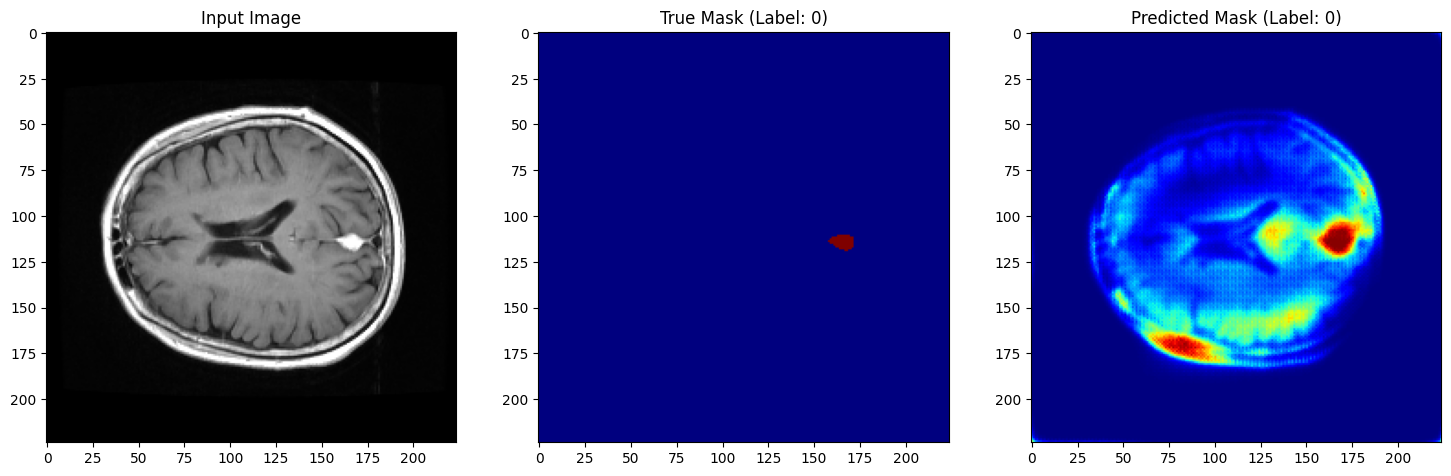

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# انتخاب یک نمونه تصادفی از داده‌های تست
test_idx = np.random.randint(0, len(X_test))
test_img = X_test[test_idx]
test_mask = y_test_mask[test_idx]  # ماسک واقعی سگمنتیشن
test_label = y_test_labels[test_idx]  # برچسب واقعی کلاسیفیکیشن

# پیش‌بینی مدل
pred_outputs = model.predict(test_img[np.newaxis, ...])
pred_mask = pred_outputs[0][0]  # خروجی سگمنتیشن
pred_label = pred_outputs[1][0]  # خروجی کلاسیفیکیشن

# بررسی و اصلاح ابعاد ماسک‌ها
if test_mask.ndim == 3:  # اگر ماسک چند کاناله است (one-hot encoded)
    test_mask = np.argmax(test_mask, axis=-1)
    pred_mask = np.argmax(pred_mask, axis=-1)
else:  # اگر ماسک دودویی است
    test_mask = test_mask.squeeze()
    pred_mask = pred_mask.squeeze()

# پلات نتایج
plt.figure(figsize=(18, 6))

# تصویر ورودی
plt.subplot(1, 3, 1)
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title('Input Image')

# ماسک واقعی
plt.subplot(1, 3, 2)
plt.imshow(test_mask, cmap='jet')
plt.title(f'True Mask (Label: {test_label})')

# ماسک پیش‌بینی شده
plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap='jet')
plt.title(f'Predicted Mask (Label: {np.argmax(pred_label)})')

plt.show()